In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

In [3]:
tsne = pd.read_csv("data/tsne_group1/version1.csv")
tsne.head()

,0,1
0,-134.534230,7.742938
1,-112.802020,-20.262478
2,-98.183720,13.204059
3,-113.940680,38.493225
4,-127.478836,-2.771115


In [20]:
labels = pd.read_csv("data/version1_group1/group1_clust_labels.csv")
labels = labels[['cell_id', 'ward_4_clusters', 'ward_5_clusters', 'ward_6_clusters']]
labels

KeyError: "['cell_id'] not in index"

In [6]:
file_dist = pd.DataFrame({"filename" : labels['cell_id'].apply(lambda x: x[:10]).unique()})
file_dist.head()

,filename
0,GSM2560245
1,GSM2560246
2,GSM2560247
3,GSM2560248
4,GSM2560249


In [8]:
def extract_cluster(df, cluster_label, labels):
    return df.loc[df[labels] == cluster_label]

In [9]:
def get_file_distr_per_cluster(df):
    file_distr = df['cell_id'].value_counts()
    return file_distr

In [10]:
# keeping only filename in cell_id
labels['cell_id'] = labels['cell_id'].apply(lambda cell_id : cell_id[:10])

In [11]:
# getting columns with cluster labels
columns = labels.columns[1:]

In [12]:
top_dir = "suplementary_figures/"

In [13]:
# creating directory for each algorithm
clustering_method = "" 
for column in columns:
    current_clustering_method = column.split("_")[0]
    
    if clustering_method != current_clustering_method:
        clustering_method = current_clustering_method
        os.mkdir(os.path.join(top_dir, clustering_method))

In [14]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [15]:
def plot_all_file_dists(columns):
    for column in columns:
        tmp = labels[['cell_id', column]]
        tmp_file_dist = file_dist.copy()

        number_of_clusters = labels[column].nunique()
        clustering_method = column.split("_")[0]

        for cluster_label in range(number_of_clusters):
            cluster = extract_cluster(labels, cluster_label, column)
            clust_dist = get_file_distr_per_cluster(cluster)
            clust_dist = clust_dist.rename("cluster: %d" % cluster_label)
            tmp_file_dist = tmp_file_dist.join(clust_dist, on="filename", how="left")

        tmp_file_dist.plot.bar(subplots=True, color=colors[1:], figsize=(6,11), x=0)
        plt.xticks(rotation=45)
        plt.savefig(os.path.join(top_dir, clustering_method, column.replace(" ", "_")+".png"))


In [16]:
def scatter_plot_clusters(df):
    plt.figure(figsize=(8, 7))
    number_of_clusters = max(df['labels']) + 1
    for j in range(-1, number_of_clusters):
        if j == -1:
            label = 'noise'
        else:
            label = 'cluster %d' % j
            
        cluster = df.loc[df['labels'] == j]
        plt.scatter(x=cluster.iloc[:, 0], y=cluster.iloc[:, 1], label=label, alpha=0.75, edgecolor='black')
    plt.legend()

In [17]:
def plot_all_tsne(columns):
    for column in columns:
        clustering_method = column.split("_")[0]
        tsne['labels'] = labels[column]
        scatter_plot_clusters(tsne)
        plt.savefig(os.path.join(top_dir, clustering_method, column.replace(" ", "_") + "_tsne_plot.png"))

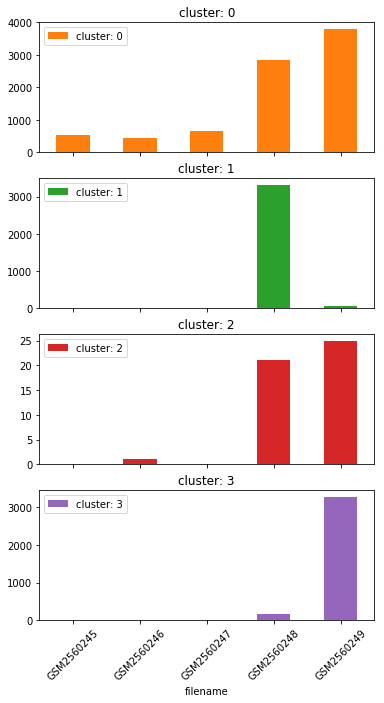

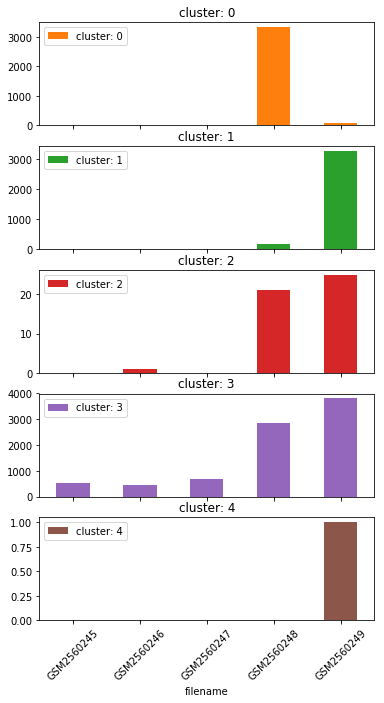

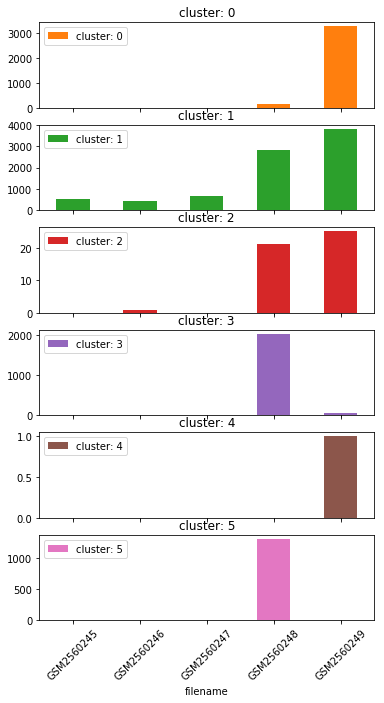

In [18]:
plot_all_file_dists(columns)

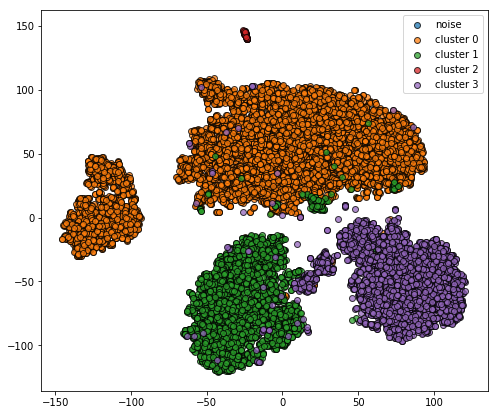

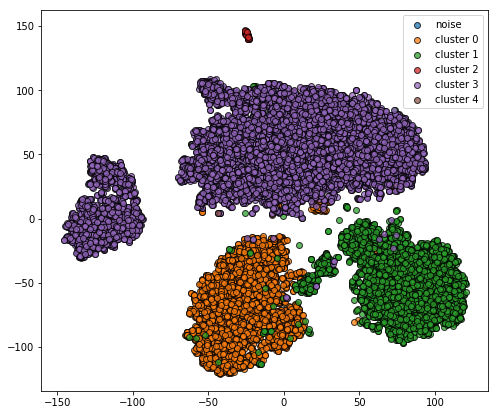

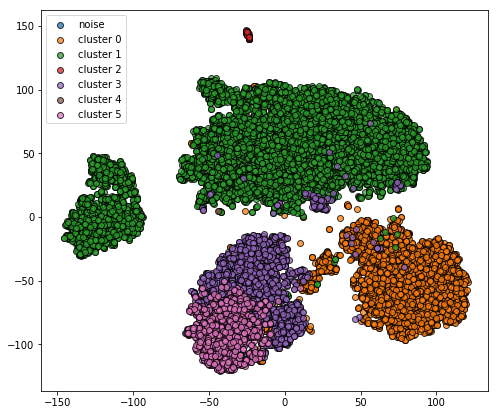

In [19]:
plot_all_tsne(columns)